In [2]:
import pandas as pd
from pathlib import Path
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# File paths
airlines_path = "./Airlines.csv"
data_path = "./airlines/"

# Airlines information

In [4]:
df_airlines = pd.read_csv(airlines_path)
df_airlines.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [5]:
df_airlines.shape

(1571, 2)

In [6]:
df_airlines.isna().sum()

Code           1
Description    0
dtype: int64

In [7]:
df_airlines[df_airlines.Code.isna()]

,Code,Description
929,NaN,North American Airlines


# Load all the flights information

In [8]:
fligths_parquets = Path(data_path).glob("Combined_Flights*.parquet")
df_flights =  pd.read_parquet(next(fligths_parquets))
for fligths_parquet in fligths_parquets:
    temp = pd.read_parquet(fligths_parquet)
    print(f'Name: {fligths_parquet}. Shape: {temp.shape}')
    df_flights = pd.concat([df_flights, temp], ignore_index=True)

Name: D:\data_sets\airlines\Combined_Flights_2019.parquet. Shape: (8091684, 61)
Name: D:\data_sets\airlines\Combined_Flights_2020.parquet. Shape: (5022397, 61)
Name: D:\data_sets\airlines\Combined_Flights_2021.parquet. Shape: (6311871, 61)
Name: D:\data_sets\airlines\Combined_Flights_2022.parquet. Shape: (4078318, 61)


In [9]:
df_flights.shape

(29193782, 61)

In [10]:
na_fields = df_flights.isna().sum().to_dict()

### NA count

In [11]:
na_columns = {x : na_fields[x] for x in na_fields.keys() if na_fields[x] != 0}
len(na_columns), na_columns

(19,
 {'DepTime': 761652,
  'DepDelayMinutes': 763084,
  'DepDelay': 763084,
  'ArrTime': 786177,
  'ArrDelayMinutes': 846183,
  'AirTime': 852561,
  'CRSElapsedTime': 22,
  'ActualElapsedTime': 845637,
  'Tail_Number': 267613,
  'DepDel15': 763084,
  'DepartureDelayGroups': 763084,
  'TaxiOut': 780561,
  'WheelsOff': 780551,
  'WheelsOn': 793133,
  'TaxiIn': 793143,
  'ArrDelay': 846183,
  'ArrDel15': 846183,
  'ArrivalDelayGroups': 846183,
  'DivAirportLandings': 90})

In [12]:
na_columns.keys()

dict_keys(['DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime', 'Tail_Number', 'DepDel15', 'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups', 'DivAirportLandings'])

In [13]:
df_flights[na_columns.keys()].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29193782 entries, 0 to 29193781
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   DepTime               float64
 1   DepDelayMinutes       float64
 2   DepDelay              float64
 3   ArrTime               float64
 4   ArrDelayMinutes       float64
 5   AirTime               float64
 6   CRSElapsedTime        float64
 7   ActualElapsedTime     float64
 8   Tail_Number           object 
 9   DepDel15              float64
 10  DepartureDelayGroups  float64
 11  TaxiOut               float64
 12  WheelsOff             float64
 13  WheelsOn              float64
 14  TaxiIn                float64
 15  ArrDelay              float64
 16  ArrDel15              float64
 17  ArrivalDelayGroups    float64
 18  DivAirportLandings    float64
dtypes: float64(18), object(1)
memory usage: 4.1+ GB


# Columns with possible util information

- DepTime
- DepDelayMinutes
- ArrTime
- ArrDelay
- ArrDel15              
- ArrDelayMinutes  
- Airtime     
- DepDelay
- CarrierDelay
- WeatherDelay
- NASDelay
- SecurityDelay
- LateAircraftDelay
- DepDel15
- DepartureDelayGroups

## Columns with NA information

| Columns |  count | Columns info | 
|----------------------------------------------------|-----------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|DepTime | 761652 | float64 |
|DepDelayMinutes | 763084 | float64 |
|DepDelay | 763084 | float64 |
|ArrTime | 786177 | float64 |
|ArrDelayMinutes | 846183 | float64 |
|AirTime | 852561 | float64 |
|CRSElapsedTime | 22 | float64 |
|ActualElapsedTime | 845637 | float64 |
|Tail_Number | 267613 | object |
|DepDel15 | 763084 | float64 |
|DepartureDelayGroups | 763084 | float64 |
|TaxiOut | 780561 | float64 |
|WheelsOff | 780551 | float64 |
|WheelsOn | 793133 | float64 |
|TaxiIn | 793143 | float64 |
|ArrDelay | 846183 | float64 |
|ArrDel15 | 846183 | float64 |
|ArrivalDelayGroups | 846183 | float64 |
|DivAirportLandings| 90 | float64 |

In [14]:
orig_rows = df_flights.shape[0]
df_flights.dropna(inplace=True)
dropped_rows = df_flights.shape[0]
dropped = orig_rows - dropped_rows
f"Original row count: {orig_rows}. Dropped rows: {dropped}. Current count: {dropped_rows}"

'Original row count: 29193782. Dropped rows: 854272. Current count: 28339510'

# Historical canceled flights

In [15]:
df_flights.columns

Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'DOT_ID_Marketing_Airline', 'IATA_Code_Marketing_Airline',
       'Flight_Number_Marketing_Airline', 'Operating_Airline',
       'DOT_ID_Operating_Airline', 'IATA_Code_Operating_Airline',
       'Tail_Number', 'Flight_Number_Operating_Airline', 'OriginAirportID',
       'OriginAirportSeqID', 'OriginCityMarketID', 'OriginCityName',
       'OriginState', 'OriginStateFips', 'OriginStateName', 'OriginWac',
       'DestAirportID', 'DestAirportSeqID', 'DestCityMarketID', 'DestCityName',
       'DestState', 'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOu

In [16]:
df_flights.DepDelay.shape, df_flights.ArrDelay.shape, df_flights.FlightDate.shape

((28339510,), (28339510,), (28339510,))

In [17]:
cols = ["DepDelay", "ArrDelay", "FlightDate"]
delays_cls = df_flights[cols]

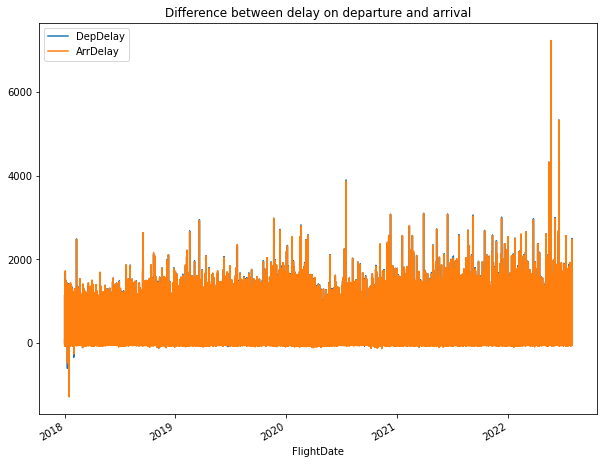

In [18]:
delays_cls.plot(x="FlightDate", y=["DepDelay", "ArrDelay"], title="Difference between delay on departure and arrival", figsize=(10, 8))
None

# Statistical data of departures
-  DepTime
- DepDelayMinutes
- DepDelay
- DepDel15
- DepartureDelayGroups

In [19]:
dep_cols = ["DepTime",
"DepDelayMinutes",
"DepDelay",
"DepDel15",
"DepartureDelayGroups"
]
df_departures = df_flights[dep_cols]
df_departures.head()

,DepTime,DepDelayMinutes,DepDelay,DepDel15,DepartureDelayGroups
0,1157.0,0.0,-5.0,0.0,-1.0
1,1157.0,0.0,-5.0,0.0,-1.0
2,1153.0,0.0,-9.0,0.0,-1.0
3,1150.0,0.0,-12.0,0.0,-1.0
4,1355.0,0.0,-5.0,0.0,-1.0


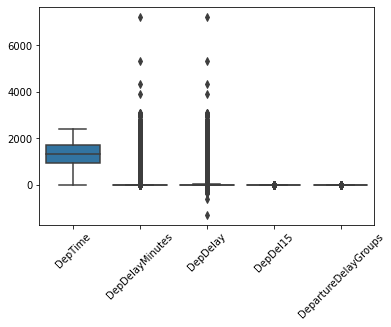

In [20]:
chart = sns.boxplot(data=df_departures)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
None

In [21]:
df_departures.describe()

,DepTime,DepDelayMinutes,DepDelay,DepDel15,DepartureDelayGroups
count,2.833951e+07,2.833951e+07,2.833951e+07,2.833951e+07,2.833951e+07
mean,1.329147e+03,1.271745e+01,9.238474e+00,1.722425e-01,-1.981223e-02
std,4.950206e+02,4.599462e+01,4.710141e+01,3.775911e-01,2.157985e+00
min,1.000000e+00,0.000000e+00,-1.280000e+03,0.000000e+00,-2.000000e+00
25%,9.190000e+02,0.000000e+00,-6.000000e+00,0.000000e+00,-1.000000e+00
50%,1.323000e+03,0.000000e+00,-3.000000e+00,0.000000e+00,-1.000000e+00
75%,1.736000e+03,5.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00
max,2.400000e+03,7.223000e+03,7.223000e+03,1.000000e+00,1.200000e+01


## Maximum departure delay

In [30]:
df_departures.DepDelayMinutes.max() / 60 / 24, "days"

(5.0159722222222225, 'days')

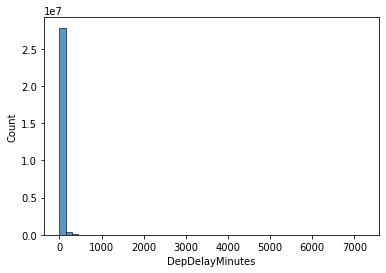

In [28]:
sns.histplot(x=df_departures.DepDelayMinutes, bins=50)
None

# Save cleaned data to parquet

In [ ]:
# df_flights.to_parquet("../flights.parquet")

# Pyspark data wrangling

In [ ]:
# from pyspark import SparkContext, SparkConf
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import count, desc, nanvl, col, max

In [ ]:
# configure = SparkConf().setAppName("spark").setMaster("local")
# sc = SparkContext(conf=configure)
# spark = SparkSession.builder.appName("spark").getOrCreate()